In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"C:\Users\Yolo's Finest\OneDrive\Documents\GitHub\Practice_Hub\tennis_stats.csv")
# print(df.head())
print(df.describe())

              Year   FirstServe  FirstServePointsWon  \
count  1721.000000  1721.000000          1721.000000   
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000             0.890000   

       FirstServeReturnPointsWon  SecondServePointsWon  \
count                1721.000000           1721.000000   
mean                    0.261673              0.479733   
std                     0.056639              0.066902   
min                     0.000000              0.060000   
25%                     0.240000              0.460000   
50%                     0.270000              0.490000   
75%                     0.290000              0.520000   
max                     0.48000

The tennis stats data ranges between 2009 - 2017.

Includes offensive stats and defensive stats. 

Columns list:
# Identifying Data
Player: name of the tennis player

Year: year data was recorded

# Service Game Columns (Offensive)

Aces: number of serves by the player where the receiver does not touch the ball

DoubleFaults: number of times player missed both first and second serve attempts

FirstServe: % of first-serve attempts made

FirstServePointsWon: % of first-serve attempt points won by the player

SecondServePointsWon: % of second-serve attempt points won by the player

BreakPointsFaced: number of times where the receiver could have won service game of the player

BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance

ServiceGamesPlayed: total number of games where the player served

ServiceGamesWon: total number of games where the player served and won

TotalServicePointsWon: % of points in games where the player served that they won

# Return Game Columns (Defensive)

FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win

SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win

BreakPointsOpportunities: number of times where the player could have won the service game of the opponent

BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance

ReturnGamesPlayed: total number of games where the player’s opponent served

ReturnGamesWon: total number of games where the player’s opponent served and the player won

ReturnPointsWon: total number of points where the player’s opponent served and the player won

TotalPointsWon: % of points won by the player

# Outcomes

Wins: number of matches won in a year

Losses: number of matches lost in a year

Winnings: total winnings in USD($) in a year

Ranking: ranking at the end of year

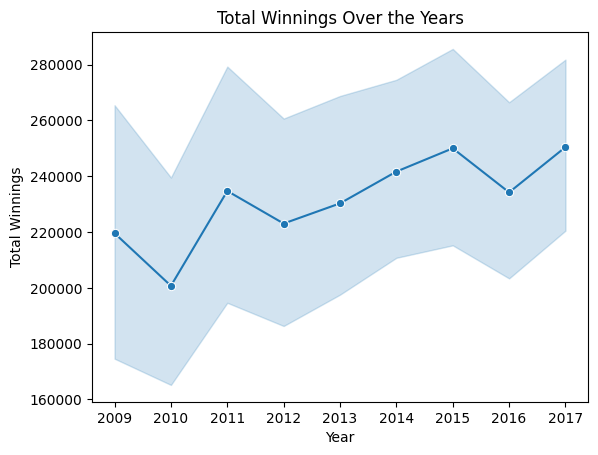

In [39]:
# Does any Offensive features mixed with Defense features predict the outcomes?

wins = df['Wins']
player = df['Player']
money_in = df['Winnings']
time = df['Year']

# Aggregate winnings by year
yearly_winnings = df.groupby('Year')['Winnings'].sum().reset_index()

# Plot winnings trend
sns.lineplot(data=yearly_winnings, x=time, y=money_in, marker='o')
plt.title('Total Winnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Winnings')
plt.show()



Winnings is on a positive trend over the years. Wins are on a downtrend. It's taking less wins on average to make the same or more money? I wouldn't jump to that conclusion so soon. 

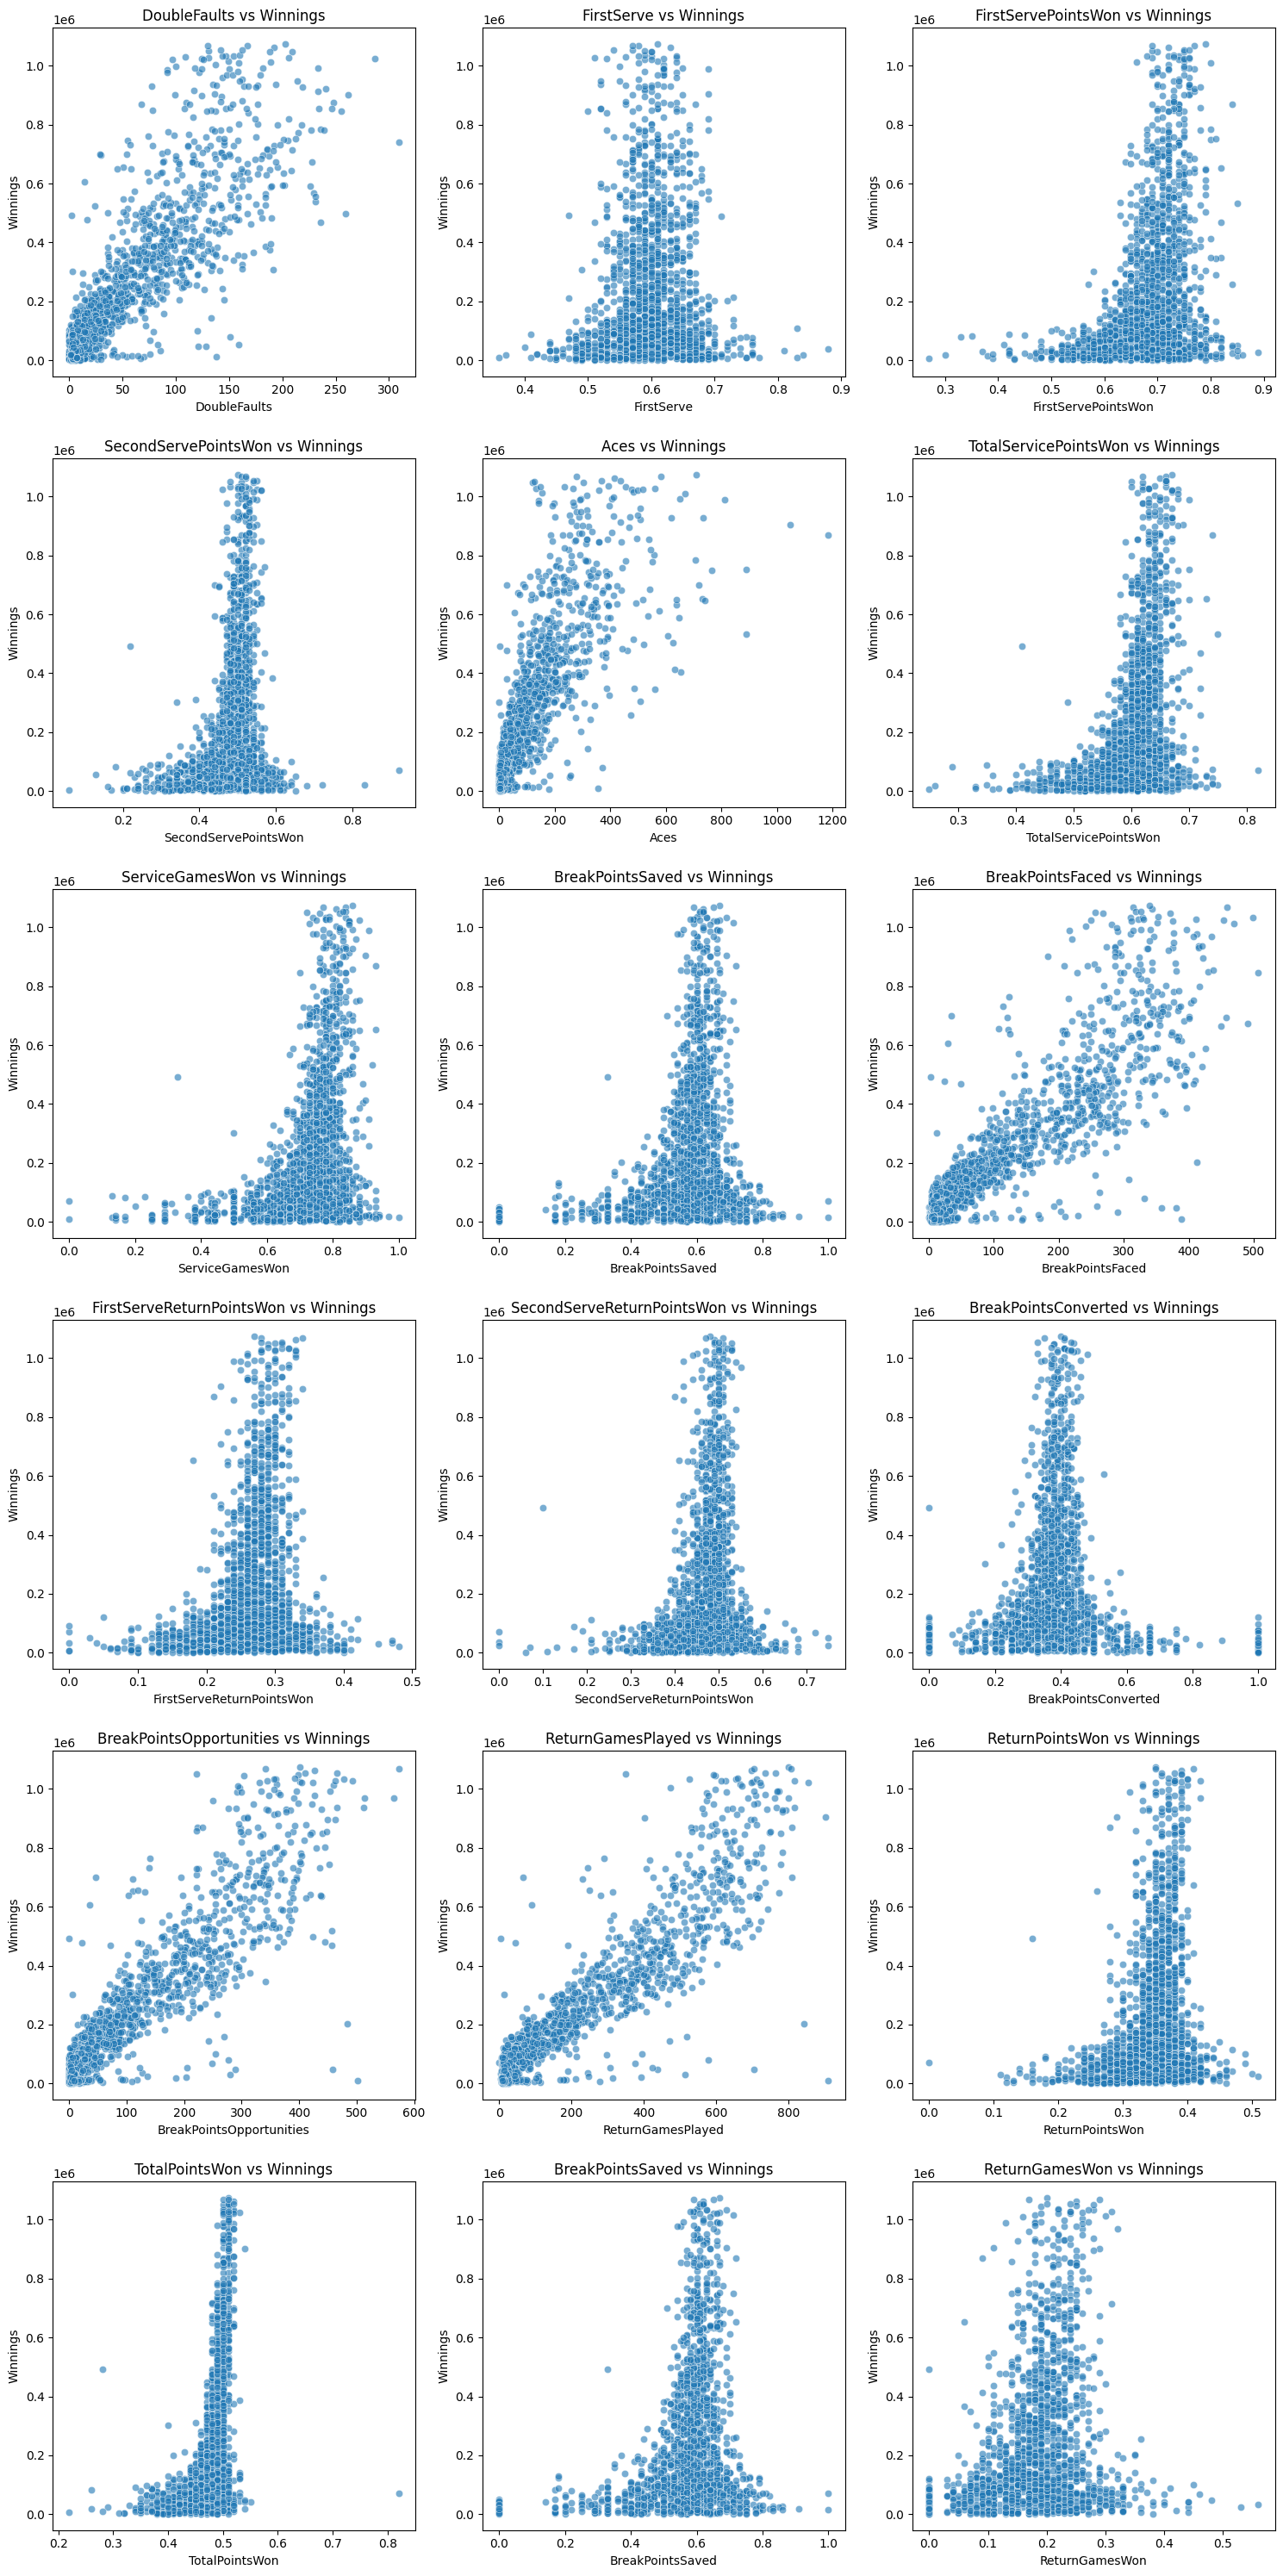

In [40]:
#How many unique players are we looking at? 438 Players
# print(df['Player'].nunique())

import math

# List of offensive and defensive features
offensive_features = ['DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'Aces', 'TotalServicePointsWon','ServiceGamesWon','BreakPointsSaved','BreakPointsFaced']
defensive_features = ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsConverted', 'BreakPointsOpportunities', 'ReturnGamesPlayed', 'ReturnPointsWon', 'TotalPointsWon', 
                      'BreakPointsSaved', 'ReturnGamesWon']

# Combine offensive and defensive features
all_features = offensive_features + defensive_features

# Determine the number of rows and columns for the grid
n_features = len(all_features)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols)  # Calculate the required number of rows

# Create the grid of scatter plots
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust the figure size dynamically
for i, feature in enumerate(all_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Dynamically set grid positions
    sns.scatterplot(data=df, x=feature, y=money_in, alpha=0.6)
    plt.title(f'{feature} vs Winnings', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Winnings', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Top 5**

- Double Faults
- Aces
- Break Points Opportunities
- Break Points Faced
- Return Games Played

*All 5 of these features seem to have a viewable association with the player's winnings. To dive deeper, let's calculate their association values. 

In [41]:
#Here we will be performing a personr test. 

from scipy.stats import pearsonr
import numpy as np

db_faults = df["DoubleFaults"]
aces = df["Aces"]
bpo = df['BreakPointsOpportunities']
bpf = df['BreakPointsFaced']
rgp = df['ReturnGamesPlayed']

#Aces
coef, pval = pearsonr(aces, money_in)
print(f'Co factor for Aces: {coef}')
print(pval)

#Double Faults
coef1, pval1 = pearsonr(db_faults, money_in)
print(f'Co factor for Double Faults: {coef1}')
print(pval1)

#Break Points Opportunities
coef2, pval2 = pearsonr(bpo, money_in)
print(f'Co factor for Break Points Opportunities: {coef2}')
print(pval2)

#Break Points Faced
coef3, pval3 = pearsonr(bpf, money_in)
print(f'Co factor for Break Points Faced: {coef3}')
print(pval3)

#Return Games Played
coef4, pval4 = pearsonr(rgp, money_in)
print(f'Co factor for return games played: {coef4}')
print(pval4)

Co factor for Aces: 0.7984043540699404
0.0
Co factor for Double Faults: 0.854685178443894
0.0
Co factor for Break Points Opportunities: 0.9004439010037775
0.0
Co factor for Break Points Faced: 0.8760356989199045
0.0
Co factor for return games played: 0.9126126236635086
0.0


*Return Games Played had the strongest coefficient while they were all significant in determing the average winnings of any successful player.*

R^2 score: 0.8236756869088457
Coefficient: 1046.77
Intercept: 25657.62


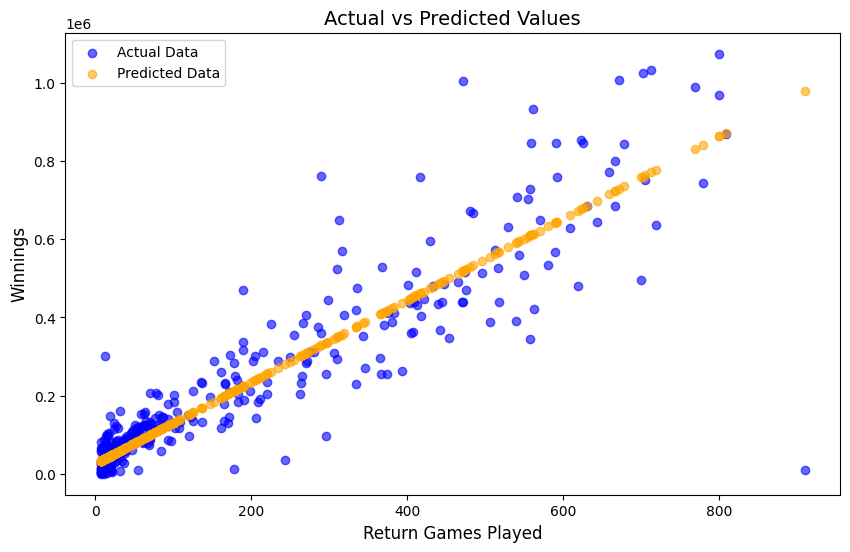

c:\Users\Yolo's Finest\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


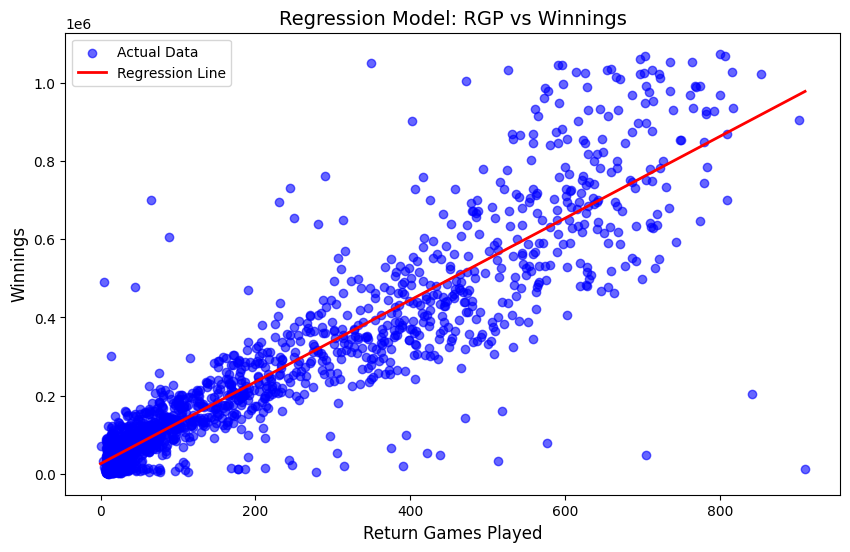

In [42]:
#Using rgp feature and outcome money_in, we will use the train_test_split before creating our regression model. 
rgp = df[["ReturnGamesPlayed"]]
features_train, features_test, outcome_train, outcome_test = train_test_split(rgp, money_in, train_size=0.8, random_state=42)

#Create model
model = LinearRegression()
model.fit(features_train, outcome_train)
r2_score = model.score(features_test, outcome_test)
print(f"R^2 score: {r2_score}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
#Predicted outcomes
prediction = model.predict(features_test)
# Scatterplot of test data (actual vs. predicted)
plt.figure(figsize=(10, 6))
plt.scatter(features_test, outcome_test, alpha=0.6, label="Actual Data", color="blue")
plt.scatter(features_test, prediction, alpha=0.6, label="Predicted Data", color="orange")
plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("Return Games Played", fontsize=12)
plt.ylabel("Winnings", fontsize=12)
plt.legend()
plt.show()

# Plot model against entire dataset
# Generate predictions for a line
rgp_range = np.linspace(rgp.min().values[0], rgp.max().values[0], 100).reshape(-1, 1)
predicted_line = model.predict(rgp_range)

plt.figure(figsize=(10, 6))
plt.scatter(rgp, money_in, alpha=0.6, label="Actual Data", color="blue")
plt.plot(rgp_range, predicted_line, color="red", label="Regression Line", linewidth=2)
plt.title("Regression Model: RGP vs Winnings", fontsize=14)
plt.xlabel("Return Games Played", fontsize=12)
plt.ylabel("Winnings", fontsize=12)
plt.legend()
plt.show()

R^2 score: 0.7412654477720719
Coefficient: 1861.66
Intercept: 23970.22


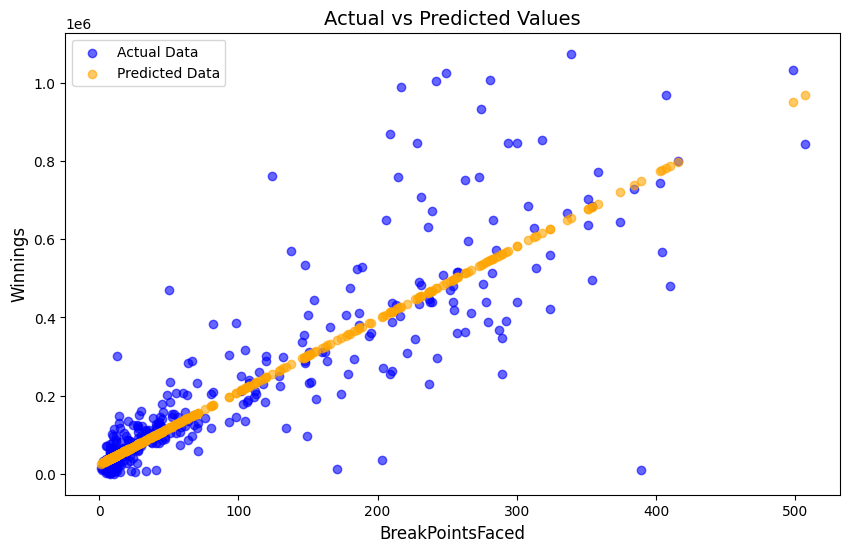

c:\Users\Yolo's Finest\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


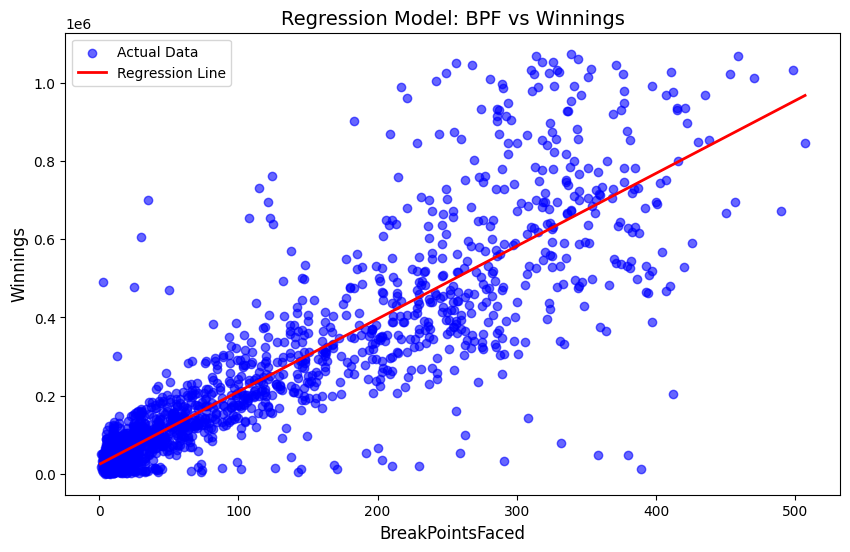

In [43]:
# Creating another model to test which one is visually better when comparing player winnings to a feature. Next we will be looking at Break Point Faced and Break Point Opportunities

#Break Points Faced
#Using bpf feature and outcome money_in, we will use the train_test_split before creating our regression model1. 
bpf = df[["BreakPointsFaced"]]
features_train1, features_test1, outcome_train1, outcome_test1 = train_test_split(bpf, money_in, train_size=0.8, random_state=42)

#Create model1
model1 = LinearRegression()
model1.fit(features_train1, outcome_train1)
r2_score1 = model1.score(features_test1, outcome_test1)
print(f"R^2 score: {r2_score1}")
print(f"Coefficient: {model1.coef_[0]:.2f}")
print(f"Intercept: {model1.intercept_:.2f}")
#Predicted outcomes
prediction1 = model1.predict(features_test1)
# Scatterplot of test data (actual vs. predicted)
plt.figure(figsize=(10, 6))
plt.scatter(features_test1, outcome_test1, alpha=0.6, label="Actual Data", color="blue")
plt.scatter(features_test1, prediction1, alpha=0.6, label="Predicted Data", color="orange")
plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("BreakPointsFaced", fontsize=12)
plt.ylabel("Winnings", fontsize=12)
plt.legend()
plt.show()

# Plot model1 against entire dataset
# Generate predictions for a line
bpf_range1 = np.linspace(bpf.min().values[0], bpf.max().values[0], 100).reshape(-1, 1)
predicted_line1 = model1.predict(bpf_range1)

plt.figure(figsize=(10, 6))
plt.scatter(bpf, money_in, alpha=0.6, label="Actual Data", color="blue")
plt.plot(bpf_range1, predicted_line1, color="red", label="Regression Line", linewidth=2)
plt.title("Regression Model: BPF vs Winnings", fontsize=14)
plt.xlabel("BreakPointsFaced", fontsize=12)
plt.ylabel("Winnings", fontsize=12)
plt.legend()
plt.show()

R^2 score: 0.7865551696389492
Coefficient: 1860.66
Intercept: 41429.14


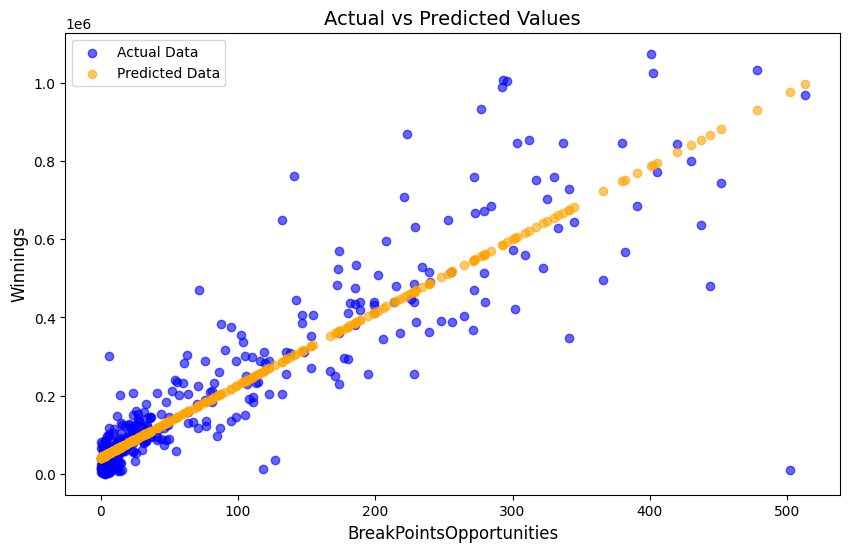

c:\Users\Yolo's Finest\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


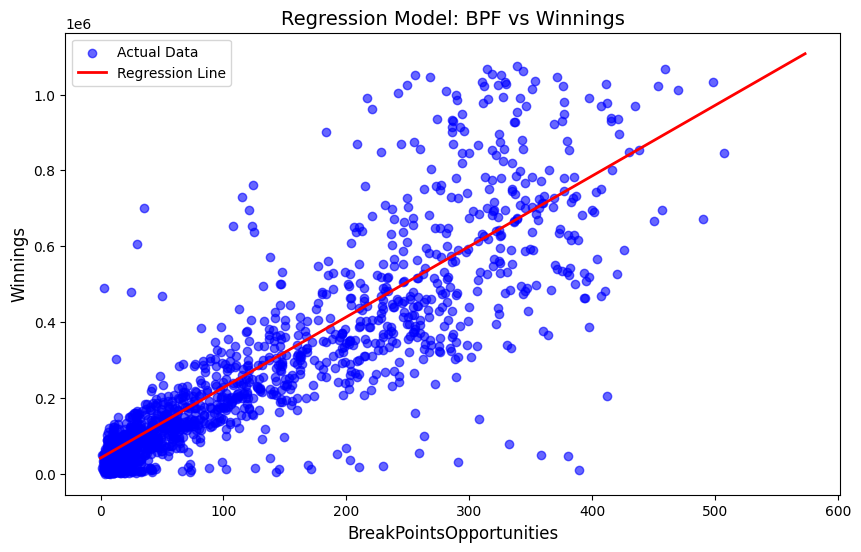

In [44]:
#Break Points Opportunity
#Using bpo feature and outcome money_in, we will use the train_test_split before creating our regression model2. 
bpo = df[["BreakPointsOpportunities"]]
features_train2, features_test2, outcome_train2, outcome_test2 = train_test_split(bpo, money_in, train_size=0.8, random_state=42)

#Create model2
model2 = LinearRegression()
model2.fit(features_train2, outcome_train2)
r2_score2 = model2.score(features_test2, outcome_test2)
print(f"R^2 score: {r2_score2}")
print(f"Coefficient: {model2.coef_[0]:.2f}")
print(f"Intercept: {model2.intercept_:.2f}")
#Predicted outcomes
prediction2 = model2.predict(features_test2)
# Scatterplot of test data (actual vs. predicted)
plt.figure(figsize=(10, 6))
plt.scatter(features_test2, outcome_test2, alpha=0.6, label="Actual Data", color="blue")
plt.scatter(features_test2, prediction2, alpha=0.6, label="Predicted Data", color="orange")
plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("BreakPointsOpportunities", fontsize=12)
plt.ylabel("Winnings", fontsize=12)
plt.legend()
plt.show()

# Plot model2 against entire dataset
# Generate predictions for a line
bpo_range = np.linspace(bpo.min().values[0], bpo.max().values[0], 100).reshape(-1, 1)
predicted_line2 = model2.predict(bpo_range)

plt.figure(figsize=(10, 6))
plt.scatter(bpf, money_in, alpha=0.6, label="Actual Data", color="blue")
plt.plot(bpo_range, predicted_line2, color="red", label="Regression Line", linewidth=2)
plt.title("Regression Model: BPO vs Winnings", fontsize=14)
plt.xlabel("BreakPointsOpportunities", fontsize=12)
plt.ylabel("Winnings", fontsize=12)
plt.legend()
plt.show()

**Return games played is still the better model feature with a score 0.82 and averaging higher than the other two consistently.**

**Multiple Features**

Next begins the test of multiple feature linear regression models. 

R² Score: 0.82
Coefficients: [1021.90822178   47.23520742]
Intercept: 26057.827544243773


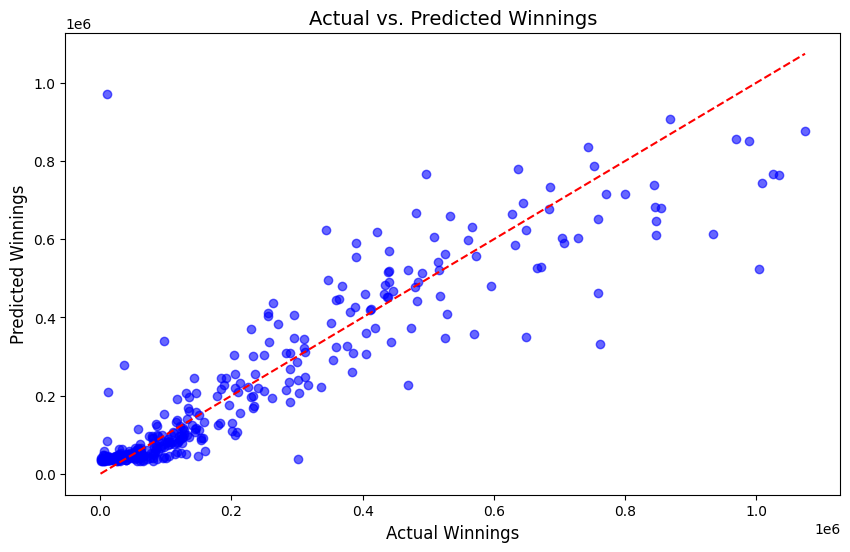

             Feature  Coefficient
0  ReturnGamesPlayed  1021.908222
1               Aces    47.235207


In [49]:
#First pair 'ReturnGamesPlayed' and 'Aces'

feat_pair = df[["ReturnGamesPlayed", "Aces"]]

feat_train, feat_test, target_train, target_test = train_test_split(feat_pair, money_in, train_size=0.8, random_state=42)

#Create model2
model_p1 = LinearRegression()
model_p1.fit(feat_train, target_train)

#Evaluate the model
r2_score_p1 = model_p1.score(feat_test, target_test)
print(f"R² Score: {r2_score_p1:.2f}")
print("Coefficients:", model_p1.coef_)
print("Intercept:", model_p1.intercept_)

# Predicted outcomes
pred_p1 = model_p1.predict(feat_test)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(target_test, pred_p1, alpha=0.6, color="blue")
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color="red", linestyle="--")
plt.title("Actual vs. Predicted Winnings", fontsize=14)
plt.xlabel("Actual Winnings", fontsize=12)
plt.ylabel("Predicted Winnings", fontsize=12)
plt.show()

# Display feature importance
feature_importance = pd.DataFrame({
    "Feature": feat_pair.columns,
    "Coefficient": model_p1.coef_
})
print(feature_importance)

R² Score: 0.79
Coefficients: [   1888.9283565  -194804.42307894]
Intercept: 89465.43135133744


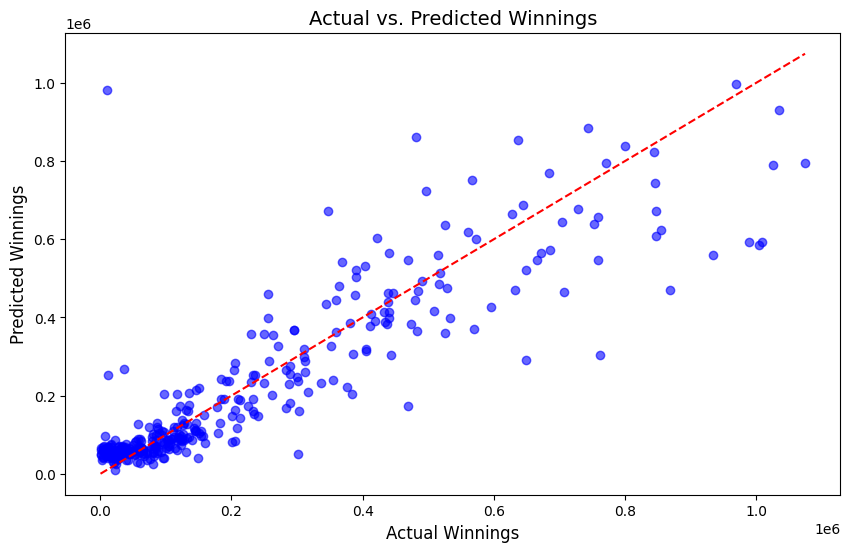

                     Feature    Coefficient
0   BreakPointsOpportunities    1888.928356
1  FirstServeReturnPointsWon -194804.423079


In [51]:
#Second pair 'BreakPointsOpportunities' and 'FirstServeReturnPointsWon'

feat_pair1 = df[["BreakPointsOpportunities", "FirstServeReturnPointsWon"]]

feat_train1, feat_test1, target_train1, target_test1 = train_test_split(feat_pair1, money_in, train_size=0.8, random_state=42)

#Create model_p2
model_p2 = LinearRegression()
model_p2.fit(feat_train1, target_train1)

#Evaluate the model
r2_score_p2 = model_p2.score(feat_test1, target_test1)
print(f"R² Score: {r2_score_p2:.2f}")
print("Coefficients:", model_p2.coef_)
print("Intercept:", model_p2.intercept_)

# Predicted outcomes
pred_p2 = model_p2.predict(feat_test1)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(target_test1, pred_p2, alpha=0.6, color="blue")
plt.plot([target_test1.min(), target_test1.max()], [target_test1.min(), target_test1.max()], color="red", linestyle="--")
plt.title("Actual vs. Predicted Winnings", fontsize=14)
plt.xlabel("Actual Winnings", fontsize=12)
plt.ylabel("Predicted Winnings", fontsize=12)
plt.show()

# Display feature importance
feature_importance1 = pd.DataFrame({
    "Feature": feat_pair1.columns,
    "Coefficient": model_p2.coef_
})
print(feature_importance1)

R² Score: 0.74
Coefficients: [  1863.63911044 -14664.99492517]
Intercept: 29167.281984053203


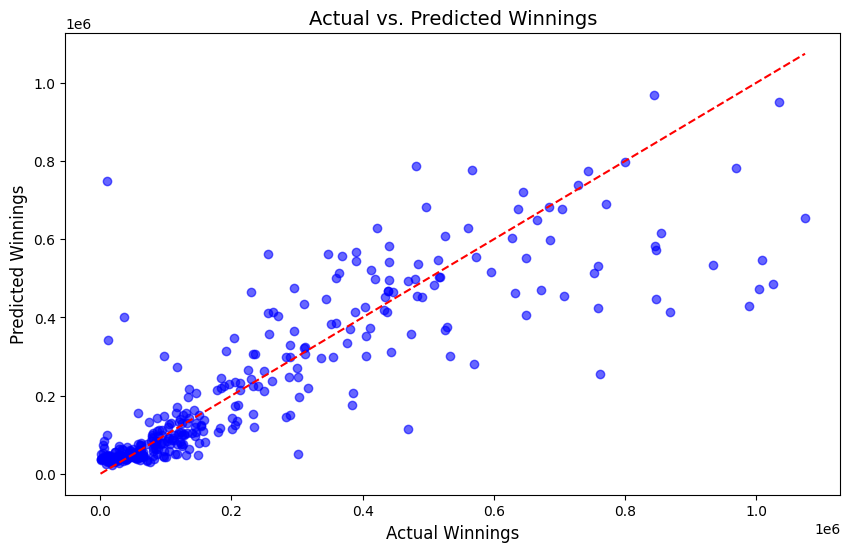

                Feature   Coefficient
0      BreakPointsFaced   1863.639110
1  BreakPointsConverted -14664.994925


In [52]:
#Second pair 'BreakPointsFaced' and 'BreakPointsConverted'

feat_pair2 = df[["BreakPointsFaced", "BreakPointsConverted"]]

feat_train2, feat_test2, target_train2, target_test2 = train_test_split(feat_pair2, money_in, train_size=0.8, random_state=42)

#Create model_p3
model_p3 = LinearRegression()
model_p3.fit(feat_train2, target_train2)

#Evaluate the model
r2_score_p3 = model_p3.score(feat_test2, target_test2)
print(f"R² Score: {r2_score_p3:.2f}")
print("Coefficients:", model_p3.coef_)
print("Intercept:", model_p3.intercept_)

# Predicted outcomes
pred_p3 = model_p3.predict(feat_test2)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(target_test2, pred_p3, alpha=0.6, color="blue")
plt.plot([target_test2.min(), target_test2.max()], [target_test2.min(), target_test2.max()], color="red", linestyle="--")
plt.title("Actual vs. Predicted Winnings", fontsize=14)
plt.xlabel("Actual Winnings", fontsize=12)
plt.ylabel("Predicted Winnings", fontsize=12)
plt.show()

# Display feature importance
feature_importance2 = pd.DataFrame({
    "Feature": feat_pair2.columns,
    "Coefficient": model_p3.coef_
})
print(feature_importance2)

**Return Games and Aces had the best score between the double feature models. Next let's test offense against winnings versus the defensive stats.**

R² Score: 0.82
Coefficients: [   433.42511013  42479.73616164  61061.81176747 103074.00459045
    489.71170517   8220.6155769   31482.19218956 -59729.84184029
   1225.63543196]
Intercept: -83068.95417520843


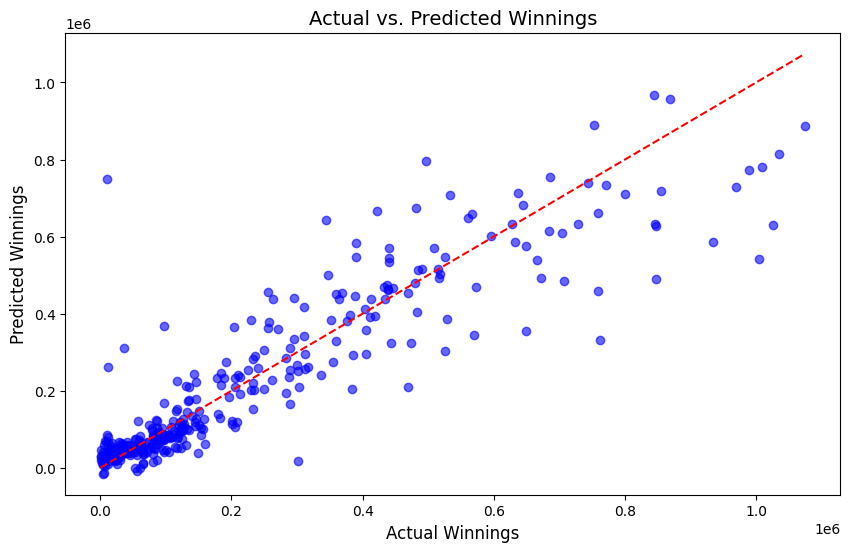

                 Feature    Coefficient
0           DoubleFaults     433.425110
1             FirstServe   42479.736162
2    FirstServePointsWon   61061.811767
3   SecondServePointsWon  103074.004590
4                   Aces     489.711705
5  TotalServicePointsWon    8220.615577
6        ServiceGamesWon   31482.192190
7       BreakPointsSaved  -59729.841840
8       BreakPointsFaced    1225.635432


In [55]:
#Offensive Linear Regression
offensive_features = df[['DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'Aces', 'TotalServicePointsWon','ServiceGamesWon','BreakPointsSaved','BreakPointsFaced']]

feat_trainof, feat_testof, target_trainof, target_testof = train_test_split(offensive_features, money_in, train_size=0.8, random_state=42)

#Create model_of
model_of = LinearRegression()
model_of.fit(feat_trainof, target_trainof)

#Evaluate the model
r2_score_of = model_of.score(feat_testof, target_testof)
print(f"R² Score: {r2_score_of:.2f}")
print("Coefficients:", model_of.coef_)
print("Intercept:", model_of.intercept_)

# Predicted outcomes
pred_of = model_of.predict(feat_testof)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(target_testof, pred_of, alpha=0.6, color="blue")
plt.plot([target_testof.min(), target_testof.max()], [target_testof.min(), target_testof.max()], color="red", linestyle="--")
plt.title("Actual vs. Predicted Winnings", fontsize=14)
plt.xlabel("Actual Winnings", fontsize=12)
plt.ylabel("Predicted Winnings", fontsize=12)
plt.show()

# Display feature importance
feature_importanceof = pd.DataFrame({
    "Feature": offensive_features.columns,
    "Coefficient": model_of.coef_
})
print(feature_importanceof)

R² Score: 0.82
Coefficients: [ -37566.64102361   10857.8535134    -7454.9837277      432.44220288
     804.31735464 -174927.84490918  151002.60509925    2684.55767591
   76297.51414432]
Intercept: 10154.95900985002


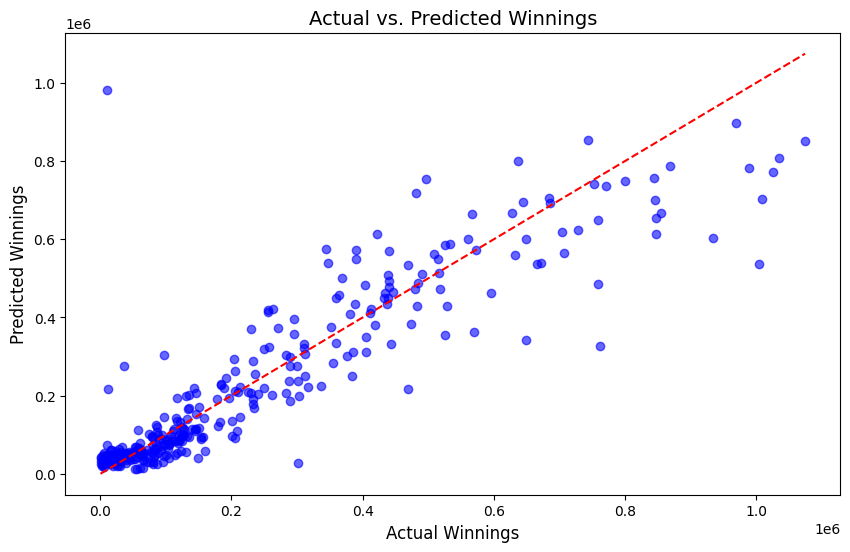

                      Feature    Coefficient
0   FirstServeReturnPointsWon  -37566.641024
1  SecondServeReturnPointsWon   10857.853513
2        BreakPointsConverted   -7454.983728
3    BreakPointsOpportunities     432.442203
4           ReturnGamesPlayed     804.317355
5             ReturnPointsWon -174927.844909
6              TotalPointsWon  151002.605099
7            BreakPointsSaved    2684.557676
8              ReturnGamesWon   76297.514144


In [58]:
#Repeat for Defensive stats
defensive_features = df[['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsConverted', 'BreakPointsOpportunities', 'ReturnGamesPlayed', 'ReturnPointsWon', 'TotalPointsWon', 
                      'BreakPointsSaved', 'ReturnGamesWon']]

feat_trainde, feat_testde, target_trainde, target_testde = train_test_split(defensive_features, money_in, train_size=0.8, random_state=42)

#Create model_de
model_de = LinearRegression()
model_de.fit(feat_trainde, target_trainde)

#Evaluate the model
r2_score_de = model_de.score(feat_testde, target_testde)
print(f"R² Score: {r2_score_de:.2f}")
print("Coefficients:", model_de.coef_)
print("Intercept:", model_de.intercept_)

# Predicted outcomes
pred_de = model_de.predict(feat_testde)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(target_testde, pred_de, alpha=0.6, color="blue")
plt.plot([target_testde.min(), target_testde.max()], [target_testde.min(), target_testde.max()], color="red", linestyle="--")
plt.title("Actual vs. Predicted Winnings", fontsize=14)
plt.xlabel("Actual Winnings", fontsize=12)
plt.ylabel("Predicted Winnings", fontsize=12)
plt.show()

# Display feature importance
feature_importancede = pd.DataFrame({
    "Feature": defensive_features.columns,
    "Coefficient": model_de.coef_
})
print(feature_importancede)

In [59]:
#To evaluate the coefficients for which feature has the biggest impact, we first have to scale each one to size for even comparison. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
offensive_features_scaled = scaler.fit_transform(offensive_features)
defensive_features_scaled = scaler.fit_transform(defensive_features)

#Train model Offense
model_scaled = LinearRegression()
model_scaled.fit(offensive_features_scaled, money_in)

#Compare standardized coefficients
for feature, coef in zip(offensive_features.columns, model_scaled.coef_):
    print(f"Feature: {feature}, Standardized Coefficient: {coef}")

Feature: FirstServeReturnPointsWon, Standardized Coefficient: -1136.4303272266975
Feature: SecondServeReturnPointsWon, Standardized Coefficient: 2079.4476814002046
Feature: BreakPointsConverted, Standardized Coefficient: -1195.8722523046224
Feature: BreakPointsOpportunities, Standardized Coefficient: 47905.47693888546
Feature: ReturnGamesPlayed, Standardized Coefficient: 181814.75299036741
Feature: ReturnPointsWon, Standardized Coefficient: -9156.499268932028
Feature: TotalPointsWon, Standardized Coefficient: 6695.144912959139
Feature: BreakPointsSaved, Standardized Coefficient: 649.150630726843
Feature: ReturnGamesWon, Standardized Coefficient: 4590.190895669141


In [ ]:
#All features play a significant part in a player's winnings but only the ones with largest coefficient and really move the needle. 